In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [22]:
#load the datset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [23]:
# to pad the sequences
X_train= sequence.pad_sequences(X_train , maxlen= 250)
X_test = sequence.pad_sequences(X_test , maxlen = 250)

In [24]:
# define the model
model = Sequential([
    Embedding(5000,32, input_length = 250),
    Flatten(),
    Dense(128, activation= 'relu'),
    Dense(1,activation='sigmoid')
])
              

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [25]:
#compile the model
model.compile(loss = 'binary_crossentropy' , optimizer ='adam',metrics=['accuracy'])


In [26]:
model.fit(X_train, y_train , epochs=4 ,batch_size =64,verbose =1)

Epoch 1/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6921 - loss: 0.5370
Epoch 2/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9426 - loss: 0.1616
Epoch 3/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0373
Epoch 4/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9992 - loss: 0.0070


In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8470 - loss: 0.6075
Accuracy: 84.93%


In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8470 - loss: 0.6075
Accuracy: 84.93%


In [29]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.92).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step


In [30]:
positive_predictions = np.sum(y_pred)
negative_predictions = len(y_pred) - positive_predictions


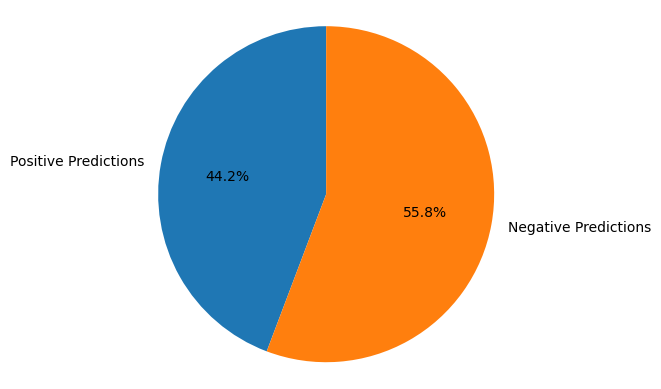

In [31]:
labels = 'Positive Predictions', 'Negative Predictions'
sizes = [positive_predictions, negative_predictions]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()